In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('plt_style.pstyle')
import seaborn as sns
def save_fig(fig: plt.figure, name: str):
    fig.savefig(f'{model_str}/plots/{name}.eps',format="eps")
    fig.savefig(f'{model_str}/plots/{name}.png',format="png")

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
model_str='LeNet'
field=np.load(model_str+'/field_layers[2].npy')

In [ ]:
model_str='50_32urc'
#field=np.load(model_str+'/field_-1.npy')
#theta=np.load(model_str+'/theta.npy')
ewh=np.load(model_str+'/ewh_all.npy')
acc=np.load(model_str+'/accevh'+'.npy')
#cf0=np.load(model_str+'/cf0'+'.npy')
#cfhc=np.load(model_str+'/cfhc'+'.npy')
#cfsv=np.load(model_str+'/cfsv'+'.npy')
#cfsvub=np.load(model_str+'/cfsv_ub'+'.npy')
accabs=np.load(model_str+'/accabs'+'.npy')
#drift_prod=np.load(model_str+'/drift_prod.npy',)
weights_prod=np.load(model_str+'/weights_prod_all.npy')
localization=np.load(model_str+'/localization.npy')
#comp=np.load(model_str+'/comp_1.npy')
#pr_l=np.load(model_str+'/pr_l_seed_2.npy')
#pr_c=np.load(model_str+'/pr_c_seed_2.npy')
#pr_init=np.load(model_str+'/pr_init.npy')
#ewh_0=np.load(model_str+'/ewh_0.npy')
#ewh_100=np.load(model_str+'/ewh_100.npy')
#ipr_first=np.load(model_str+'/ipr_first.npy')
#ipr_last=np.load(model_str+'/ipr_last.npy')
#norm=np.load(model_str+'/weights_norm.npy')
#comp=np.load(model_str+'/lancomp.npy')
#epsilon=np.load(model_str+'/epsilon_1.npy')

In [ ]:
model_str='fc_256_32urc'
loss_scale_urc=np.load(model_str+'/loss_scaling.npy')
model_str='fc_256_32reg'
loss_scale_reg=np.load(model_str+'/loss_scaling.npy')

In [ ]:
model_str="50_32urc"
step_range=3000#evh.shape[0]
step_array=np.arange(0,step_range,100)
eps=np.load(model_str+'/eps/evh_eps_'+str(0)+'.npy')
eps_2=np.load(model_str+'/eps/evh_eps_'+str(2255)+'.npy')

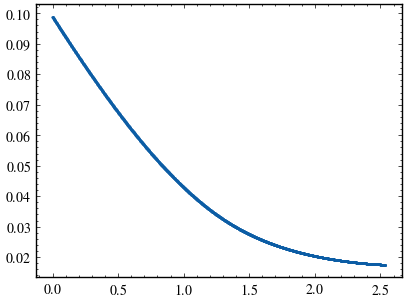

In [ ]:
fig,axs = plt.subplots(1,1,sharex=False,sharey=False,figsize=(1.4*3.3750, 1.4*2.5313))
axs.scatter(eps_2[0],np.sqrt(eps_2[2]),s=.5)
#axs.plot(eps_2[0],ewh[2238]/2*(eps_2[0,-2]-eps_2[0,:])**2+eps_2[2,-2])
#axs.set_xlim(0,2.5)

In [ ]:
np.argmin(eps[2,:])

256

In [ ]:
eps

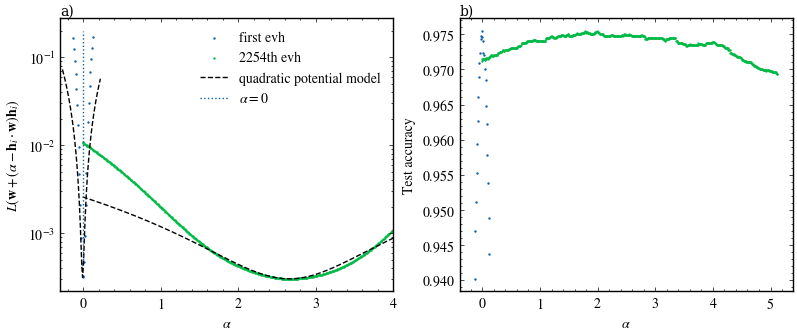

In [ ]:
fig,axs = plt.subplots(1,2,sharex=False,sharey=False,figsize=(1.4*3.3750*2, 1.4*2.5313))
axs[0].scatter(eps[0,244:270],eps[2,244:270],s=.5,label="first evh")
axs[0].scatter(eps_2[0],eps_2[2],s=.5,label="2254th evh")
axs[0].plot(eps_2[0],ewh[2255]*(eps_2[0,np.argmin(eps_2[2,:])]-eps_2[0,:])**2+np.min(eps_2[2,:]),'--k',label="quadratic potential model")
axs[0].plot(eps[0,230:280],ewh[0]*(eps[0,np.argmin(eps[2,:])]-eps[0,230:280])**2+np.min(eps[2,:]),'--k')
axs[0].set_yscale('log')
axs[0].set_ylabel(r'$L(\mathbf{w}+(\alpha-\mathbf{h}_i\cdot\mathbf{w})\mathbf{h}_i)$')
axs[0].set_xlabel(r'$\alpha$')
axs[0].text(0.0, 1.0, "a)", transform=axs[0].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[0].vlines(0,5e-4,0.2,linestyles='dotted',label=r'$\alpha=0$')
axs[1].text(0.0, 1.0, "b)", transform=axs[1].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
#axs[1].scatter(eps[0,240:270],eps[1,240:270],s=.5)
#axs[1].scatter(eps_2[0],eps_2[1],s=.5)
#axs[1].set_ylabel(r'Train accuracy')
#axs[1].set_xlabel(r'$\epsilon$')
axs[0].legend()
axs[0].set_xlim(-0.3,4)
axs[1].scatter(eps[0,244:270],eps[3,244:270],s=.5,label="first evh")
axs[1].scatter(eps_2[0],eps_2[3],s=.5,label="2238th evh")
axs[1].set_ylabel(r'Test accuracy')
axs[1].set_xlabel(r'$\alpha$')
save_fig(fig,'potentials')

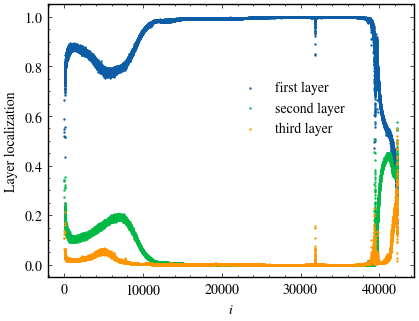

In [ ]:
fig,axs = plt.subplots(1,1,sharex=False,sharey=True,figsize=(1.4*3.3750, 1.4*2.5313))
"""axs[0].plot(localization[:,0],'.', label="first evh")
axs[0].plot(localization[:,20],'.', label="20th evh")
axs[0].plot(localization[:,1000],'.', label="1000th evh")
axs[0].set_ylabel(r'square localization')
axs[0].set_xlabel(r'layer, bias')
axs[0].legend(loc=[0.6,0.7])"""
axs.scatter(np.arange(0,localization[0,:].shape[0],1),localization[0,:],s=.5, label="first layer")
axs.scatter(np.arange(0,localization[0,:].shape[0],1),localization[2,:],s=.5, label="second layer")
axs.scatter(np.arange(0,localization[0,:].shape[0],1),localization[4,:],s=.5, label="third layer")
axs.set_ylabel(r'Layer localization')
axs.set_xlabel(r'$i$')
axs.legend(loc=[0.5,0.5])
save_fig(fig,'localization')

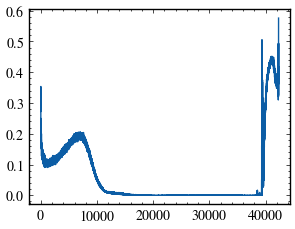

In [ ]:
plt.plot(localization[2,:])

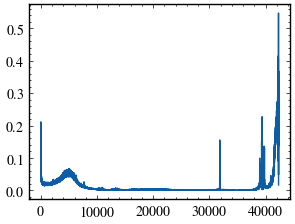

In [ ]:
plt.plot(localization[4,:])

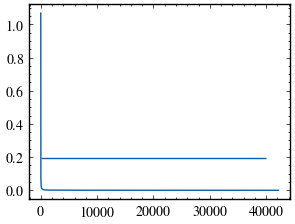

In [ ]:
plt.plot(ewh)
plt.hlines(3/(50000/32*1e-2),0,40000)

In [ ]:
model_str='fc_256_32urc'
field_urc=np.load(model_str+'/field_d3.npy')
acc_urc=np.load(model_str+'/accevh.npy')
theta_urc=np.load(model_str+'/theta.npy')
weights_prod_urc=np.load(model_str+'/weights_prod_d3.npy')
model_str='fc_256_32reg'
field_reg=np.load(model_str+'/field_d3.npy')
acc_reg=np.load(model_str+'/accevh.npy')
theta_reg=np.load(model_str+'/theta.npy')
weights_prod_reg=np.load(model_str+'/weights_prod_d3.npy')

In [ ]:
model_str='fc_256_32urc'
evh_full=np.load(model_str+'/hc_'+model_str+'.npy')
vcomp=np.load(model_str+'/vel_'+model_str+'.npy')
pcomp=np.load(model_str+'/pc_'+model_str+'.npy')
pield=np.tensordot(evh_full,pcomp,axes=(1,1))
vield=np.tensordot(evh_full,vcomp,axes=(1,1))

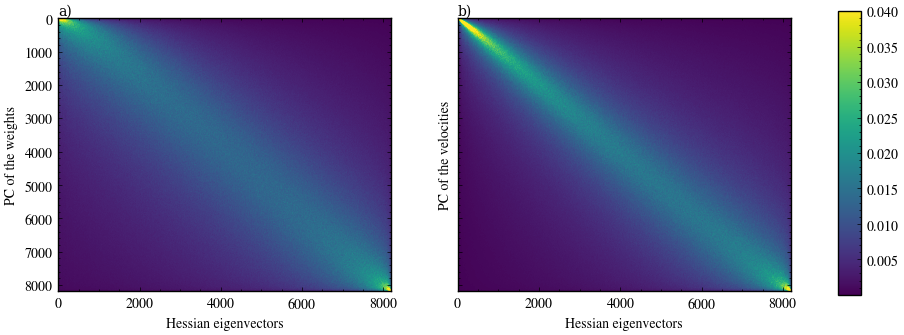

In [ ]:
lim=64
fig,axs = plt.subplots(1,2,sharex=True,sharey=True,figsize=(1.4*3.3750*2, 1.4*2.5313))
im=axs[0].imshow(np.abs(pield[:,:]),aspect='auto',vmax=4e-2)
axs[0].text(0.0, 1.0, "a)", transform=axs[0].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
im=axs[1].imshow(np.abs(vield[:,:]),aspect='auto',vmax=4e-2)
axs[1].text(0.0, 1.0, "b)", transform=axs[1].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[0].set_ylabel(r'PC of the weights')
axs[0].set_xlabel(r'Hessian eigenvectors')
axs[1].set_ylabel(r'PC of the velocities')
axs[1].set_xlabel(r'Hessian eigenvectors')
cax = plt.axes([0.95, 0.1, 0.025, 0.8])
fig.colorbar(im,cax=cax)
save_fig(fig,'pvhc')

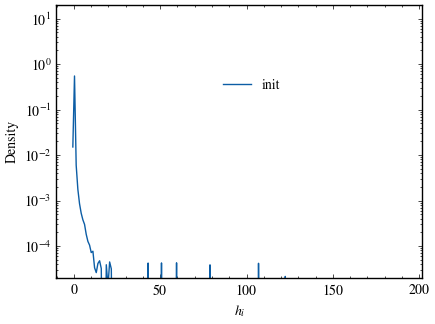

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(1.4*3.3750, 1.4*2.5313))
sns.kdeplot(ewh,log_scale=[False,True],label='init')
#sns.kdeplot(ewh_100*26.42,log_scale=[False,True],label="$100$"+ " epochs "+ "$\cdot 26$")
axs.set_ylim((2e-5,20))
axs.set_xlabel("$h_i$")
fig.legend(loc=[0.5,0.7])
#save_fig(fig,'spectra')
#plt.yscale('log')

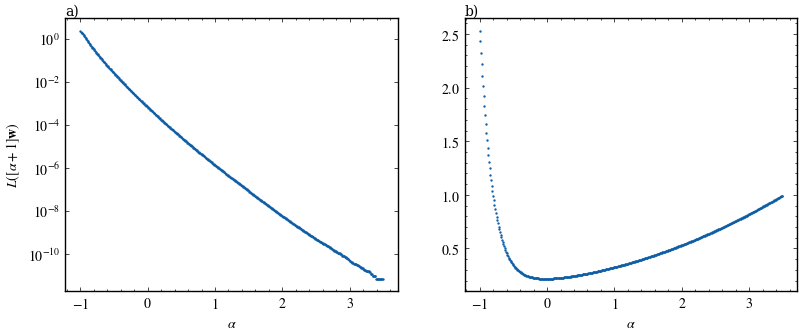

In [ ]:
fig,axs = plt.subplots(1,2,sharex=False,sharey=False,figsize=(1.4*3.3750*2, 1.4*2.5313))
axs[0].scatter(loss_scale_urc[0,100:550],loss_scale_urc[2,100:550],s=.5)
axs[1].scatter(loss_scale_reg[0,100:550],loss_scale_reg[2,100:550],s=.5)
axs[0].text(0.0, 1.0, "a)", transform=axs[0].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[1].text(0.0, 1.0, "b)", transform=axs[1].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[0].set_ylabel(r"$L([\alpha+1]\mathbf{w})$")
axs[0].set_xlabel(r"$\alpha$")
axs[1].set_xlabel(r"$\alpha$")
axs[0].set_yscale('log')
#axs[1].set_yscale('log')
save_fig(fig,'loss_scale')

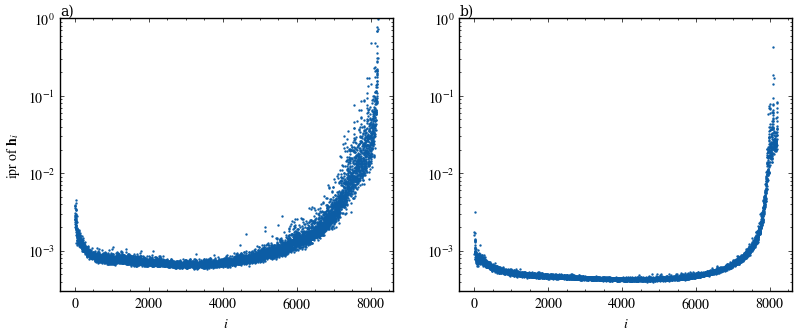

In [ ]:
fig,axs = plt.subplots(1,2,sharex=True,sharey=False,figsize=(1.4*3.3750*2, 1.4*2.5313))
axs[0].scatter(np.arange(0,ipr_first.shape[0],1),1/ipr_first,s=.5)
axs[1].scatter(np.arange(0,ipr_last.shape[0],1),1/ipr_last,s=.5)
axs[0].text(0.0, 1.0, "a)", transform=axs[0].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[1].text(0.0, 1.0, "b)", transform=axs[1].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[0].set_ylabel("ipr of $\mathbf{h}_i$")
axs[0].set_xlabel("$i$")
axs[1].set_xlabel("$i$")
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_ylim(3e-4,1)
axs[1].set_ylim(3e-4,1)
save_fig(fig,'ipr')

<Axes: ylabel='Density'>

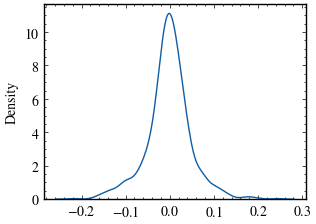

In [ ]:
sns.kdeplot(pr_l[-1,:1000])

(array([  18.,  100.,  350.,  943., 1403., 1315.,  729.,  255.,   70.,
           9.]),
 array([-0.3751682 , -0.29775244, -0.22033668, -0.14292093, -0.06550516,
         0.0119106 ,  0.08932637,  0.16674213,  0.24415788,  0.32157364,
         0.39898941]),
 <BarContainer object of 10 artists>)

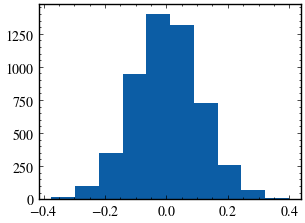

In [ ]:
plt.hist(pr_l[0,3000:])

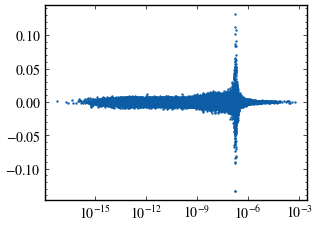

In [ ]:
plt.scatter(ewh,weights_prod,s=.5)
plt.xscale('log')

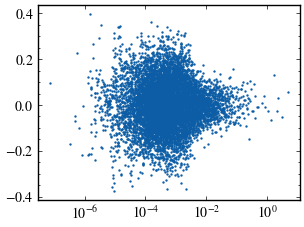

In [ ]:
plt.scatter(ewh_0,pr_l[0],s=.5)
plt.xscale('log')

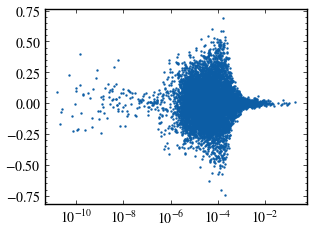

In [ ]:
plt.scatter(ewh_100,pr_l[-1],s=.5)
plt.xscale('log')

Text(0.5, 0, '$i$')

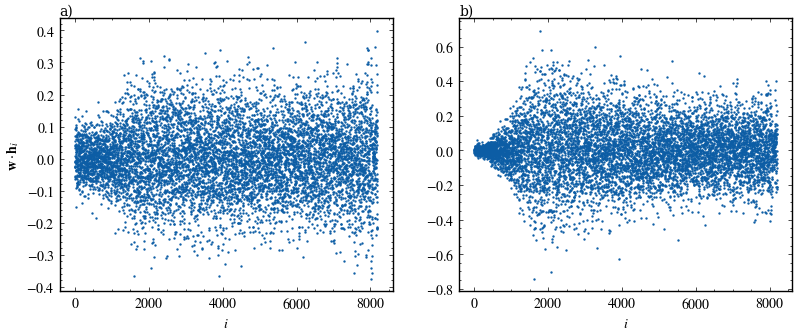

In [ ]:
fig,axs = plt.subplots(1,2,sharex=True,sharey=False,figsize=(1.4*3.3750*2, 1.4*2.5313))
axs[0].scatter(np.arange(0,pr_l.shape[1],1),pr_l[0],s=.5)
axs[1].scatter(np.arange(0,pr_l.shape[1],1),pr_c[-1],s=.5)
axs[0].text(0.0, 1.0, "a)", transform=axs[0].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[1].text(0.0, 1.0, "b)", transform=axs[1].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[0].set_ylabel("$\mathbf{w}\cdot\mathbf{h}_i$")
axs[0].set_xlabel("$i$")
axs[1].set_xlabel("$i$")
#save_fig(fig,'weights_prod_init')

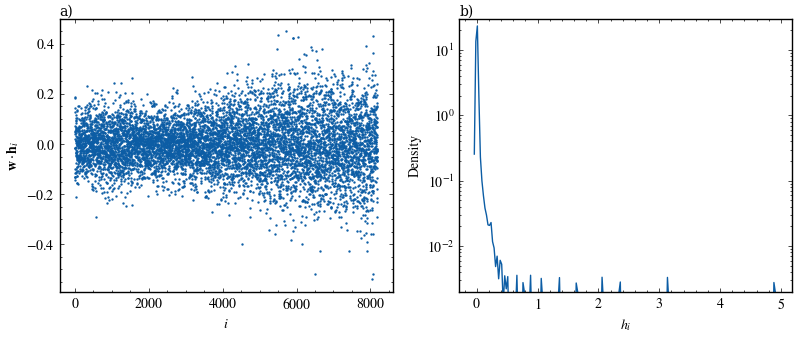

In [ ]:
fig,axs = plt.subplots(1,2,sharex=False,sharey=False,figsize=(1.4*3.3750*2, 1.4*2.5313))
axs[0].scatter(np.arange(0,pr_l.shape[1],1),pr_c[0],s=.5)
sns.kdeplot(ewh_0,log_scale=[False,True])
axs[0].text(0.0, 1.0, "a)", transform=axs[0].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[1].text(0.0, 1.0, "b)", transform=axs[1].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[0].set_ylabel("$\mathbf{w}\cdot\mathbf{h}_i$")
axs[0].set_xlabel("$i$")
axs[1].set_ylim((2e-3,30))
axs[1].set_xlabel("$h_i$")
save_fig(fig,'weights_prod_kde')

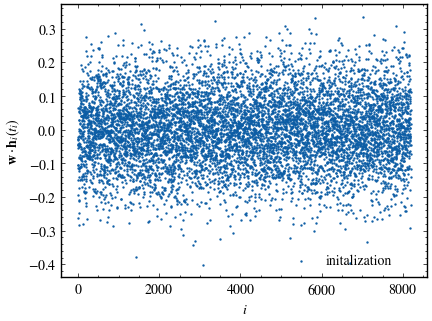

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(1.4*3.3750, 1.4*2.5313))
axs.scatter(np.arange(0,pr_l.shape[1],1),pr_init,s=.5,label="initalization")
#axs.scatter(np.arange(0,pr_l.shape[1],1),pr_c[-1],s=.5,label="100th Epoch")
axs.set_ylabel("$\mathbf{w}\cdot\mathbf{h}_i(t_i)$")
axs.set_xlabel("$i$")
fig.legend(loc=[0.65,0.15])

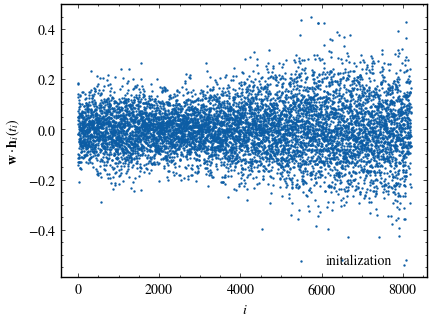

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(1.4*3.3750, 1.4*2.5313))
axs.scatter(np.arange(0,pr_l.shape[1],1),pr_c[0],s=.5,label="initalization")
#axs.scatter(np.arange(0,pr_l.shape[1],1),pr_c[-1],s=.5,label="100th Epoch")
axs.set_ylabel("$\mathbf{w}\cdot\mathbf{h}_i(t_i)$")
axs.set_xlabel("$i$")
fig.legend(loc=[0.65,0.15])
save_fig(fig,'corr_dev')

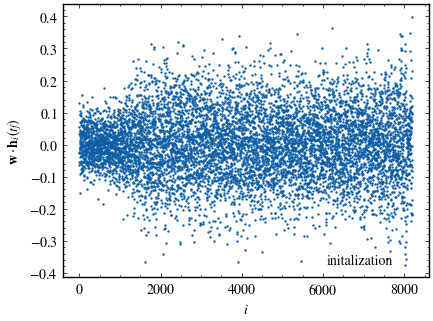

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(1.4*3.3750, 1.4*2.5313))
axs.scatter(np.arange(0,pr_l.shape[1],1),pr_l[0],s=.5,label="initalization")
#axs.scatter(np.arange(0,pr_l.shape[1],1),pr_l[3],s=.5,label="100th Epoch")
axs.set_ylabel("$\mathbf{w}\cdot\mathbf{h}_i(t_f)$")
axs.set_xlabel("$i$")
fig.legend(loc=[0.65,0.15])
save_fig(fig,'last_dev')

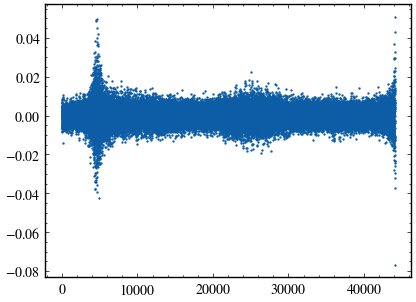

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(1.4*3.3750, 1.4*2.5313))
axs.scatter(np.arange(0,weights_prod.shape[0],1),weights_prod,s=.5)

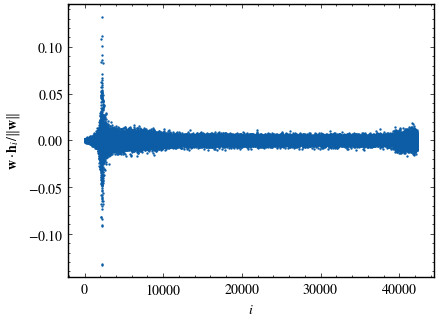

In [ ]:
fig,axs = plt.subplots(1,1,sharex=True,sharey=False,figsize=(1.4*3.3750, 1.4*2.5313))
axs.scatter(np.arange(0,weights_prod.shape[0],1),weights_prod,s=.5)
axs.set_ylabel("$\mathbf{w}\cdot\mathbf{h}_i/\|\mathbf{w}\|$")
axs.set_xlabel("$i$")
lim=np.sqrt(6/(128+64))
fig.legend(loc=[0.65,0.15])
save_fig(fig,'weights_prod')

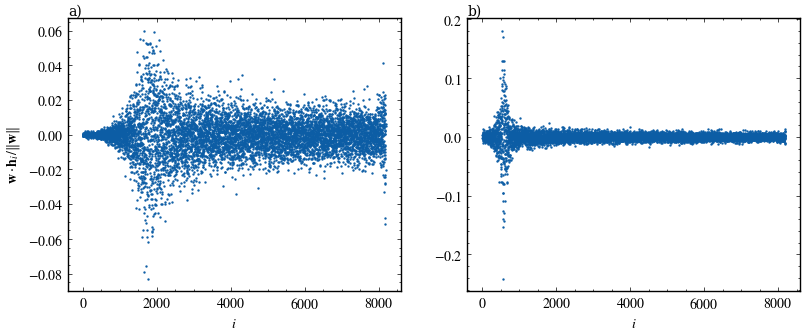

In [ ]:
fig,axs = plt.subplots(1,2,sharex=True,sharey=False,figsize=(1.4*3.3750*2, 1.4*2.5313))
axs[0].scatter(np.arange(0,weights_prod_urc.shape[0],1),weights_prod_urc,s=.5)
axs[1].scatter(np.arange(0,weights_prod_reg.shape[0],1),weights_prod_reg,s=.5)
axs[0].text(0.0, 1.0, "a)", transform=axs[0].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[1].text(0.0, 1.0, "b)", transform=axs[1].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[0].set_ylabel("$\mathbf{w}\cdot\mathbf{h}_i/\|\mathbf{w}\|$")
axs[0].set_xlabel("$i$")
axs[1].set_xlabel("$i$")
lim=np.sqrt(6/(128+64))
fig.legend(loc=[0.65,0.15])
save_fig(fig,'weights_prod')

In [ ]:
cfw[:,1]

array([0.99919999, 0.9993    , 0.9993    , 0.9993    , 0.99940002,
       0.9993    , 0.99940002, 0.99940002, 0.99940002, 0.9993    ,
       0.99940002, 0.9993    , 0.9993    , 0.9993    , 0.99940002,
       0.99940002, 0.99940002, 0.99940002, 0.99940002, 0.99940002])

In [ ]:
cfsv[:,0]

array([0.92269999, 0.92879999, 0.93010002, 0.9285    , 0.9289    ,
       0.9289    , 0.92989999, 0.92930001, 0.93000001, 0.92919999,
       0.92940003, 0.92949998, 0.92839998, 0.92989999, 0.93040001,
       0.92750001, 0.92900002, 0.92799997, 0.92809999, 0.92979997,
       0.92869997, 0.92869997, 0.93000001, 0.92760003, 0.93049997,
       0.9278    , 0.93080002, 0.92820001, 0.93059999, 0.93040001,
       0.9296    , 0.92900002, 0.92979997, 0.92930001, 0.92900002,
       0.92989999, 0.92760003, 0.92940003, 0.93059999, 0.92949998,
       0.9289    , 0.92949998, 0.9296    , 0.93019998, 0.9289    ,
       0.92879999, 0.92970002, 0.92869997, 0.92900002, 0.92900002])

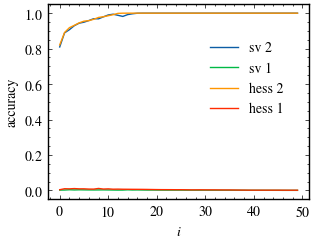

In [ ]:
fig,axs = plt.subplots(1,1)

axs.set_ylabel('accuracy')
axs.set_xlabel("$i$")
axs.plot(cfsv[:,0],label='sv 2')
axs.plot(cfsv[:,1],label='sv 1')
#axs.plot(cf0[:,0],label='train 2 0')
#axs.plot(cf0[:,1],label='train 1 0')
axs.plot(cfhc[:,0],label='hess 2')
axs.plot(cfhc[:,1],label='hess 1')
axs.legend(loc=[0.6,0.4])
#save_fig(fig,'cata_forg')

In [ ]:
arr=np.ones(10)

In [ ]:
arr[:-2].shape

(8,)

NameError: ignored

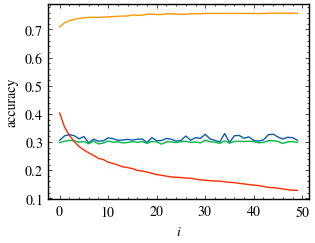

In [ ]:
fig,axs = plt.subplots(1,1)

axs.set_ylabel('accuracy')
axs.set_xlabel("$i$")
axs.plot(cfsv[:,3],label='train 2')
axs.plot(cfsv[:,2],label='train 1')
axs.plot(cf0[:,3],label='train 2 0')
axs.plot(cf0[:,2],label='train 1 0')
axs.plot(cfw[:,3],label='train 2 w')
axs.plot(cfw[:,2],label='train 1 w')
axs.legend()

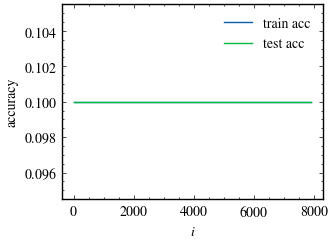

In [ ]:
fig,axs = plt.subplots(1,1)

axs.set_ylabel('accuracy')
axs.set_xlabel("$i$")
axs.plot(acc[0],acc[1],label='train acc')
axs.plot(acc[0],acc[2],label='test acc')
axs.legend()
#save_fig(fig,'accs')

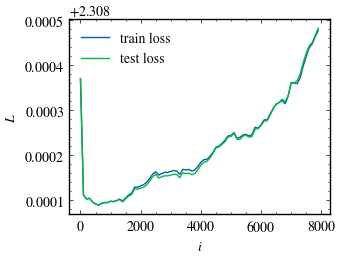

In [ ]:
fig,axs = plt.subplots(1,1)

axs.set_ylabel('$L$')
axs.set_xlabel("$i$")
axs.plot(acc[0],acc[3],label='train loss')
axs.plot(acc[0],acc[4],label='test loss')
axs.legend()
#save_fig(fig,'losses')

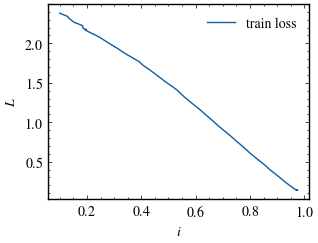

In [ ]:
fig,axs = plt.subplots(1,1)

axs.set_ylabel('$L$')
axs.set_xlabel("$i$")
axs.plot(acc[1],acc[3],label='train loss')
axs.legend()
#save_fig(fig,'losses')

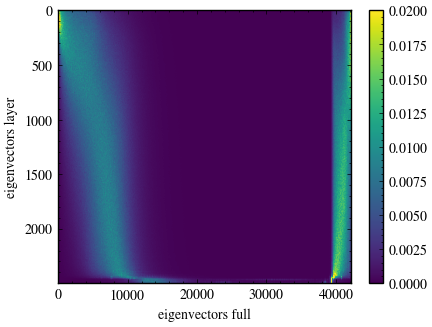

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(1.4*3.3750, 1.4*2.5313))
im=axs.imshow(np.abs(comp),aspect='auto',vmax=2e-2)
fig.colorbar(im)
axs.set_ylabel('eigenvectors layer')
axs.set_xlabel('eigenvectors full')
save_fig(fig,'ev_comp')

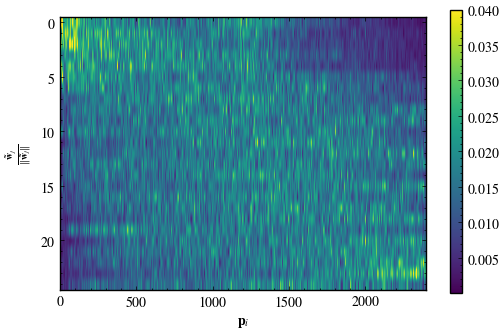

In [8]:
fig,axs = plt.subplots(1,1,sharex=True,sharey=True,figsize=(1.4*3.3750, 1.4*2.5313))
im=axs.imshow(np.abs(field[:,:]),aspect='auto',vmax=4e-2)
axs.set_ylabel(r'$\frac{\mathbf{\tilde{w}}_j}{\|\mathbf{\tilde{w}}_j\|}$')
axs.set_xlabel(r'$\mathbf{p}_i$')
cax = plt.axes([0.95, 0.1, 0.025, 0.8])
fig.colorbar(im,cax=cax)
save_fig(fig,'field_conv')

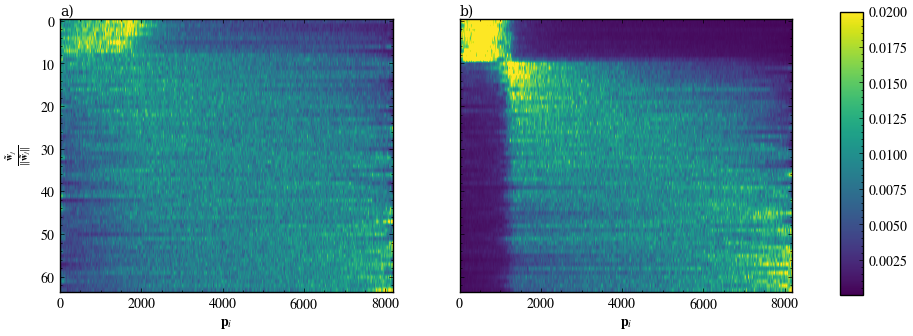

In [ ]:
lim=64
fig,axs = plt.subplots(1,2,sharex=True,sharey=True,figsize=(1.4*3.3750*2, 1.4*2.5313))
im=axs[0].imshow(np.abs(field_urc[:lim,:]),aspect='auto',vmax=2e-2)
axs[0].text(0.0, 1.0, "a)", transform=axs[0].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
im=axs[1].imshow(np.abs(field_reg[:lim,:]),aspect='auto',vmax=2e-2)
axs[1].text(0.0, 1.0, "b)", transform=axs[1].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[0].set_ylabel(r'$\frac{\mathbf{\tilde{w}}_j}{\|\mathbf{\tilde{w}}_j\|}$')
axs[0].set_xlabel(r'$\mathbf{p}_i$')
axs[1].set_xlabel(r'$\mathbf{p}_i$')
cax = plt.axes([0.95, 0.1, 0.025, 0.8])
fig.colorbar(im,cax=cax)
save_fig(fig,'hc_svd')

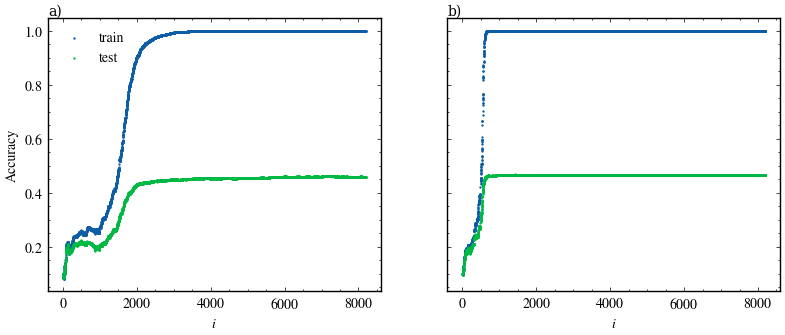

In [ ]:
fig,axs = plt.subplots(1,2,sharex=True,sharey=True,figsize=(1.4*3.3750*2, 1.4*2.5313))
axs[0].scatter(acc_urc[0],acc_urc[1],s=.5,label="train")
axs[0].scatter(acc_urc[0],acc_urc[2],s=.5,label="test")
axs[0].text(0.0, 1.0, "a)", transform=axs[0].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[1].scatter(acc_reg[0],acc_reg[1],s=.5)
axs[1].scatter(acc_reg[0],acc_reg[2],s=.5)
axs[1].text(0.0, 1.0, "b)", transform=axs[1].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[0].set_ylabel(r'Accuracy')
axs[0].set_xlabel(r'$i$')
axs[1].set_xlabel(r'$i$')
axs[0].legend()
save_fig(fig,'hc_acc')

In [ ]:
acc[1][-1]

1.0

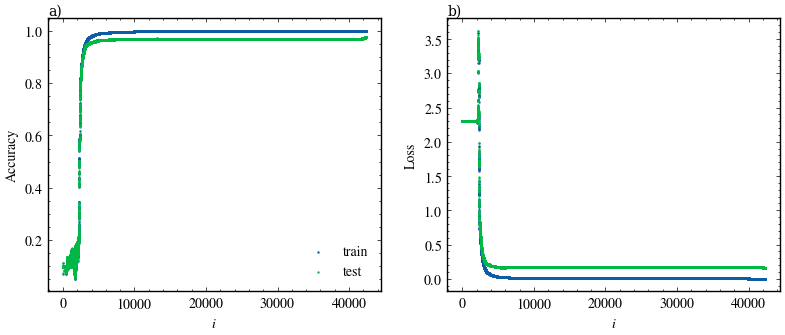

In [ ]:
fig,axs = plt.subplots(1,2,sharex=True,sharey=False,figsize=(1.4*3.3750*2, 1.4*2.5313))
axs[0].scatter(acc[0],acc[1],s=.5,label="train")
axs[0].scatter(acc[0],acc[2],s=.5,label="test")
axs[0].text(0.0, 1.0, "a)", transform=axs[0].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[1].scatter(acc[0],acc[3],s=.5)
axs[1].scatter(acc[0],acc[4],s=.5)
axs[1].text(0.0, 1.0, "b)", transform=axs[1].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[0].set_ylabel(r'Accuracy')
axs[0].set_xlabel(r'$i$')
axs[1].set_ylabel(r'Loss')
axs[1].set_xlabel(r'$i$')
axs[0].legend()
save_fig(fig,'hc_acc_nabs')

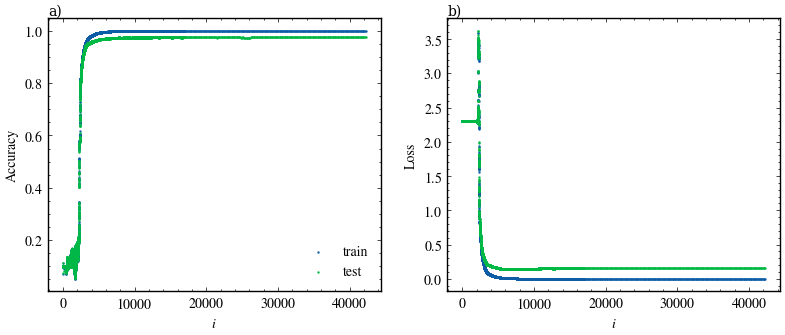

In [ ]:
fig,axs = plt.subplots(1,2,sharex=True,sharey=False,figsize=(1.4*3.3750*2, 1.4*2.5313))
axs[0].scatter(accabs[0],accabs[1],s=.5,label="train")
axs[0].scatter(accabs[0],accabs[2],s=.5,label="test")
axs[0].text(0.0, 1.0, "a)", transform=axs[0].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[1].scatter(accabs[0],accabs[3],s=.5)
axs[1].scatter(accabs[0],accabs[4],s=.5)
axs[1].text(0.0, 1.0, "b)", transform=axs[1].transAxes,fontsize='medium', va='bottom', fontfamily='serif')
axs[0].set_ylabel(r'Accuracy')
axs[0].set_xlabel(r'$i$')
axs[1].set_ylabel(r'Loss')
axs[1].set_xlabel(r'$i$')
axs[0].legend()
save_fig(fig,'hc_acc_abs')

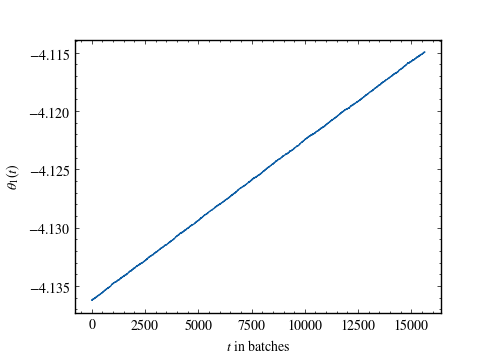

In [ ]:
fig,axs = plt.subplots(1,1,sharex=True,sharey=False,figsize=(1.4*3.3750, 1.4*2.5313))
axs.plot(theta_reg[0,:])
axs.set_ylabel(r'$\theta_1(t)$')
axs.set_xlabel(r'$t$ in batches')
fig.legend()
#save_fig(fig,'theta')

(array([7.451e+03, 3.000e+01, 7.000e+00, 4.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-4.95866188e-05,  4.02461514e-02,  8.05418864e-02,  1.20837629e-01,
         1.61133364e-01,  2.01429099e-01,  2.41724834e-01,  2.82020569e-01,
         3.22316319e-01,  3.62612039e-01,  4.02907789e-01]),
 <BarContainer object of 10 artists>)

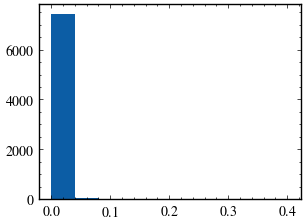

In [ ]:
plt.hist(ewh)